In [3]:
import matplotlib.pyplot as plt
import palettable as pl
plt.style.use("Solarize_Light2")
import numpy as np

In [4]:
from grid import normalize

In [5]:
timings = np.load("solution_times.npy", allow_pickle=True).item()
indices = np.load("max_idx_dict.npy", allow_pickle =True).item()

In [6]:
y =[]
x=[]
for k, v in indices.items():
    if k in timings:
        x.append(v)
        y.append(timings[k])

In [7]:
x_ = x.copy()
y_ = y.copy()

In [8]:
pol = np.polyfit(x_, y_, deg=4)
pol_string = [f"${pol[i]:.2f}x^{i}$" for i in range(len(pol))]

In [9]:
x_fit = np.linspace(0,np.max(x_)+100)
y_fit = np.polyval(pol, x_fit)

(0, 700)

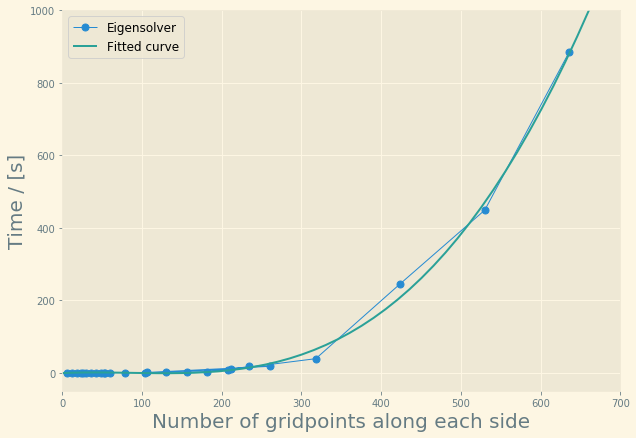

In [10]:
emr=  pl.cartocolors.sequential.Emrld_2_r.mpl_colors
plt.figure(figsize=(10,7))
#plt.gca().set_prop_cycle('color', emr)
plt.plot(x, y, marker='o', lw = 1, ms = 7, label = "Eigensolver")
plt.plot(x_fit, y_fit, lw=2, label = "Fitted curve")
plt.legend(fontsize = "large",loc="best")
plt.ylabel("Time / [s]",size=20)
plt.xlabel("Number of gridpoints along each side", size = 20)
plt.ylim(-50,1000)
plt.xlim(0,700)
#plt.savefig("timing.png")

# Test results
---

In [11]:
emr = pl.cartocolors.sequential.Emrld_7.get_mpl_colormap()

In [79]:
g, pts = 3, 2
path_sol = f"solutions/solution_{g}_{pts}.npy"
path_cls = f"solutions/classifications/{g}_{pts}.npy"
path_bnd = f"boundary_grids/{g}_{pts}.npy"

In [80]:
e,v = np.load(path_sol, allow_pickle=True)
cl = np.load(path_cls)

In [81]:
bpts = np.load(path_bnd, allow_pickle=True).item()
pos_list = np.array(list(bpts))
normalize(pos_list)
plot_list = [*pos_list, pos_list[0]]

In [82]:
N = cl.shape[0]
N

318

In [83]:
def fix_bound(cl, pos_list):
    n_dict = {tuple(p):True for p in pos_list}
    
    f = np.copy(cl)
    for k in n_dict:
        i,j = k
        f[i-1,j-1] = True
    return f

In [84]:
new_c = fix_bound(cl, pos_list)

In [85]:
tmp_e = e[0]
tmp_v = np.ma.array(v[:,0].reshape((N,N)), mask = np.invert(new_c))


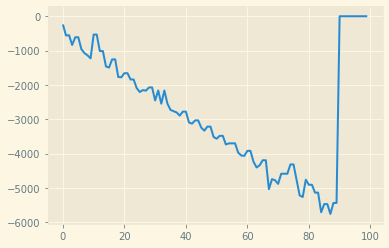

In [88]:
plt.plot(e)

4 3


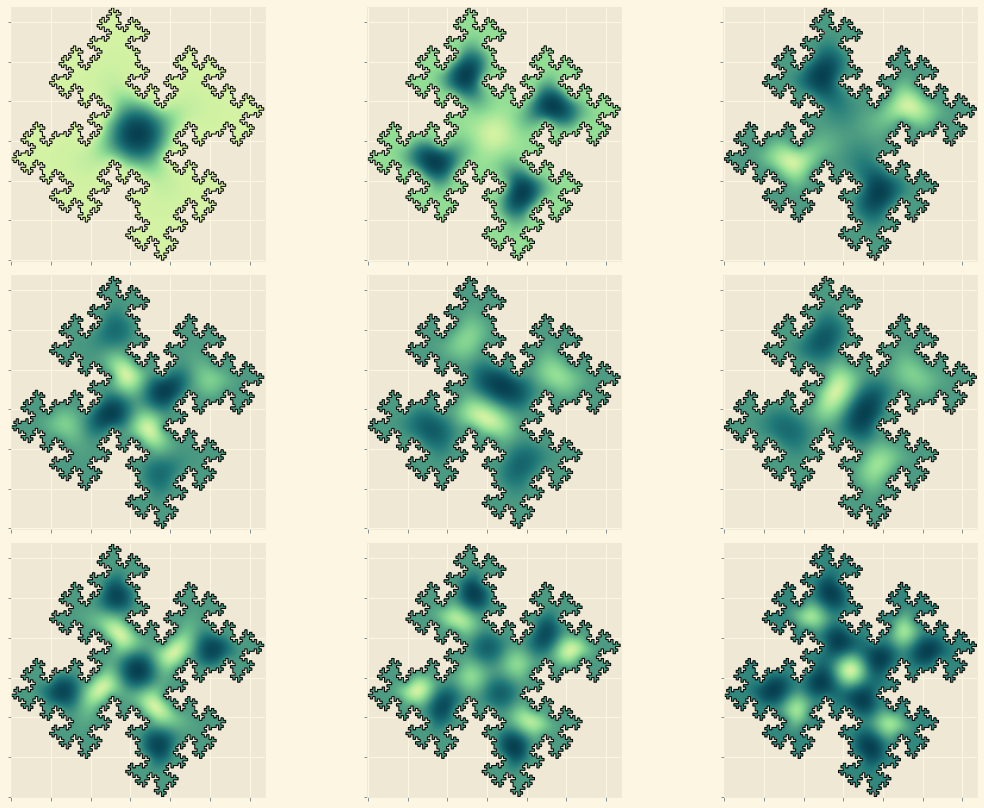

In [86]:
N_plot = 9

cases = v[:,:N_plot]



E = e[0]

def trim_axs(axs, N): 
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    Stolen from https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/markevery_demo.html#sphx-glr-gallery-lines-bars-and-markers-markevery-demo-py
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

ncols = 3
nrows = N_plot // ncols + 1
print(nrows, ncols)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(15,15))
axs = trim_axs(axs, N_plot)

for i in range(N_plot):
    w = np.ma.array(v[:,i].reshape((N,N)),mask = np.invert(new_c))
    axs[i].contourf(w.T / E, cmap = emr, levels=N, corner_mask=False)
    #axs[i].legend([r"$\frac{\epsilon_i}{\epsilon_0}=$" + f"{np.real(e[i]/E):.4f}"], fontsize = 15,loc = "best")
    axs[i].plot(*zip(*plot_list), 'k', lw=1)
    axs[i].set_yticklabels([])
    axs[i].set_ylim(-1,N+1)
    axs[i].set_xlim(-1,N+1)
    axs[i].set(aspect='equal')
    #axs[i].set_title()
    
fig.tight_layout()
#fig.colorbar(ax=axs)
#ax[i,j].plot([1, 2])

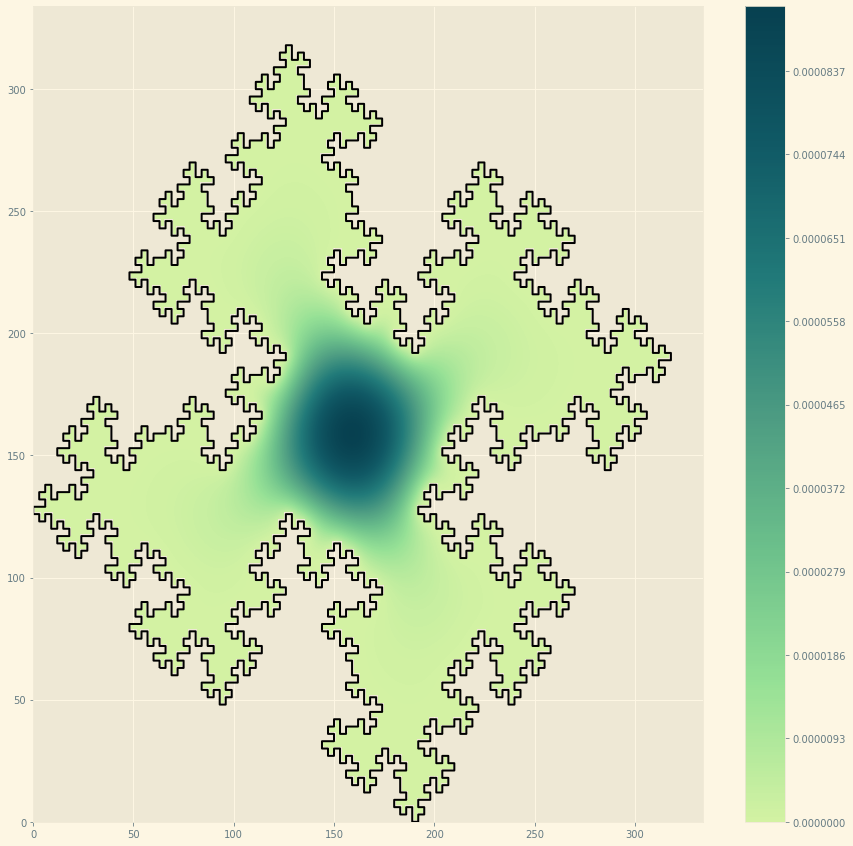

In [87]:
plt.figure(figsize=(15,15))
plt.contourf(tmp_v.T / tmp_e, cmap=emr, levels=N, corner_mask=False)
plt.plot(*zip(*plot_list), 'k', lw=2)
plt.colorbar()

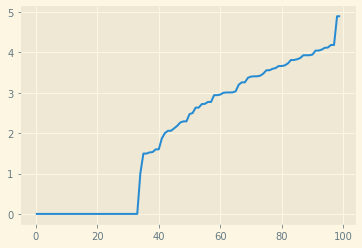

In [76]:
plt.plot(np.sort(np.sqrt(e/e[0])))

C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


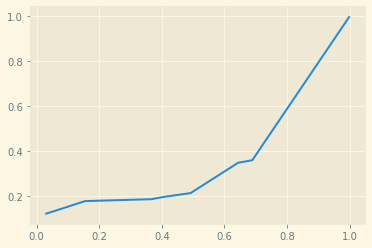

In [75]:
plt.plot((e_n/e_n[0])[:10], (e_n1/e_n1[0])[:10])

In [62]:
sort_index = np.flip(np.argsort(e))
print(sort_index)

[86 87 73 88 74 75 96 79 81 82 83 99 80 90 97 94 95 93 92 91 98 76 89 77
 78  0 66 65 11 10  9  8  1  2  6  7  3  4  5 13 12 14 15 85 84 17 16 19
 18 22 23 20 25 50 49 29 24 21 27 28 26 30 38 37 31 32 36 35 33 34 45 46
 39 40 43 44 41 42 52 53 48 47 56 57 51 54 55 60 59 58 63 64 61 62 67 68
 69 70 72 71]


In [59]:
z = v[:,sort_index]